# Imports

In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# ---
import sys; sys.path.append('../')

from commons.dataset import *
from commons.imageutils import *

from modules.img_normalizer import *
from modules.dataset import *

I0000 00:00:1735440071.121584  431940 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-23.0.22), renderer: Intel(R) Iris(TM) Plus Graphics 645
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


# Constants

In [2]:
DATASET_INPUT = DATASETS_PATHS.faces
DATASET_OUTPUT = DATASETS_PATHS.norm_faces

IMAGE_SIZE = 220
BATCH_SIZE = 32

TRAIN_PERCENT = .65# .7
VAL_PERCENT = .2
TEST_PERCENT = .15# .1
RANDOM_STATE = None

W0000 00:00:1735440071.128199  432122 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


# Load dataset

In [3]:
dataset = pd.read_csv(DATASET_INPUT.info)

W0000 00:00:1735440071.141309  432116 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


## Data slicing in training, validation and tests groups

In [4]:
train_dataset, tmp = train_test_split(dataset, train_size=TRAIN_PERCENT, stratify=dataset.setid, shuffle=True, random_state=RANDOM_STATE)
val_dataset, test_dataset = train_test_split(tmp, test_size=TEST_PERCENT/(TEST_PERCENT+VAL_PERCENT), stratify=tmp.setid, shuffle=True, random_state=RANDOM_STATE)

print('\t\tsetid\tmin-max\tproportion')
print(f"> train: \t{train_dataset.count(axis=1).size}  \t{train_dataset.setid.value_counts().min()}-{train_dataset.setid.value_counts().max()} \t{train_dataset.count(axis=1).size/dataset.count(axis=1).size:.5f}")
print(f"> val: \t\t{val_dataset.count(axis=1).size}  \t{val_dataset.setid.value_counts().min()}-{val_dataset.setid.value_counts().max()} \t{val_dataset.count(axis=1).size/dataset.count(axis=1).size:.5f}")
print(f"> test: \t{test_dataset.count(axis=1).size}  \t{test_dataset.setid.value_counts().min()}-{test_dataset.setid.value_counts().max()} \t{test_dataset.count(axis=1).size/dataset.count(axis=1).size:.5f}")

		setid	min-max	proportion
> train: 	236  	9-10 	0.64835
> val: 		73  	2-3 	0.20055
> test: 	55  	2-3 	0.15110


In [5]:
print((train_dataset.path.isin(test_dataset.path) == True).value_counts(), end='\n\n')
print((train_dataset.path.isin(val_dataset.path) == True).value_counts(), end='\n\n')
print((val_dataset.path.isin(test_dataset.path) == True).value_counts(), end='\n\n')

path
False    236
Name: count, dtype: int64

path
False    236
Name: count, dtype: int64

path
False    73
Name: count, dtype: int64



# Checking custom datasets

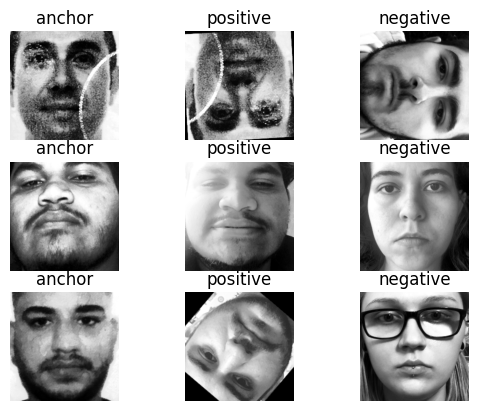

In [6]:
train_dataset = CD_TrippletsCreator(train_dataset, transform=normalize(IMAGE_SIZE), data_augmentation_tranforms=[data_augmentation()])

plt.figure()
for i in range(3):
	anch, pos, neg, *_ = train_dataset[random.randint(0, len(dataset))]
	plt.subplot(3, 3, i*3 + 1); show_img(anch, title='anchor', gray=True)
	plt.subplot(3, 3, i*3 + 2); show_img(pos, title='positive', gray=True)
	plt.subplot(3, 3, i*3 + 3); show_img(neg, title='negative', gray=True)
	